손글씨 이미지 이용 숫자 준비

In [2]:
import cv2
import matplotlib.pyplot as plt

title1 = "No_data"
no_data = cv2.imread("images/Img_Num.jpg")
if (no_data is None):
    raise Exception("image load Err")
print(no_data.shape)
no_data[no_data >= 170] = 255

(42, 320, 3)


In [4]:
img_gray = cv2.cvtColor(no_data, cv2.COLOR_BGR2GRAY)
ret, img_th = cv2. threshold(img_gray, 150, 230, cv2.THRESH_BINARY_INV)
contours, hierachy = cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
for rect in rects:
# Draw the rectangles
    cv2. rectangle(no_data, (rect[0], rect[1]),
                    (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0),1)


[(297, 13, 11, 14), (103, 13, 12, 18), (41, 13, 12, 17), (232, 12, 11, 20), (172, 12, 9, 19), (136, 12, 12, 19), (74, 12, 10, 18), (14, 12, 7, 20), (264, 11, 10, 20), (202, 11, 12, 19)]


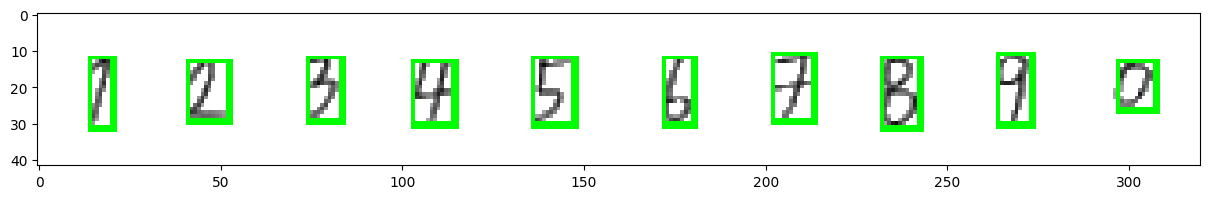

In [5]:
plt.figure(figsize=(15,12))
plt.imshow(no_data);
print (rects);

In [6]:
centers = list()
for rect in rects:
    centers.append([rect[0] + (rect[2]/2), rect[1] + (rect[3]/2)])
print(centers)

[[302.5, 20.0], [109.0, 22.0], [47.0, 21.5], [237.5, 22.0], [176.5, 21.5], [142.0, 21.5], [79.0, 21.0], [17.5, 22.0], [269.0, 21.0], [208.0, 20.5]]


In [7]:
for center_data in centers:
    print(int(center_data[0]), int(center_data[1]))
    t_x = int(center_data[0])
    t_y = int(center_data[1])

    cv2.circle(no_data, (t_x, t_y), 1, (255, 0, 0), 1)

302 20
109 22
47 21
237 22
176 21
142 21
79 21
17 22
269 21
208 20


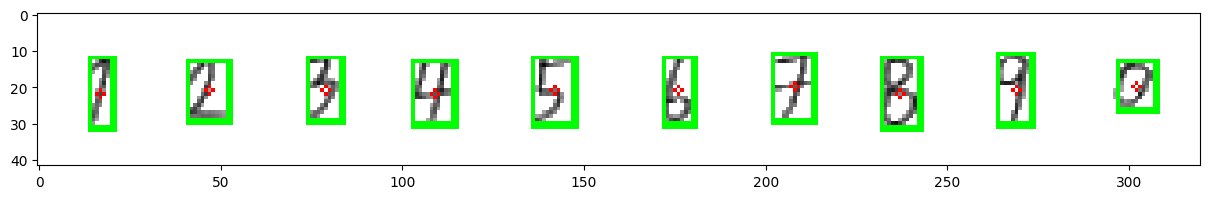

In [8]:
plt.figure(figsize=(15, 12))
plt.imshow(no_data)

In [9]:
for center_data in centers:
    t_x = int(center_data[0])
    t_y = int(center_data[1])
    cv2.rectangle(no_data, (t_x-14, t_y-14), (t_x+14, t_y+14), (0, 0, 255),1)
    print(t_x, t_y)
    rect_img = no_data[t_y-14:t_y+14, t_x-14:t_x+14]
    cv2.imshow("test", rect_img)

302 20
109 22
47 21
237 22
176 21
142 21
79 21
17 22
269 21
208 20


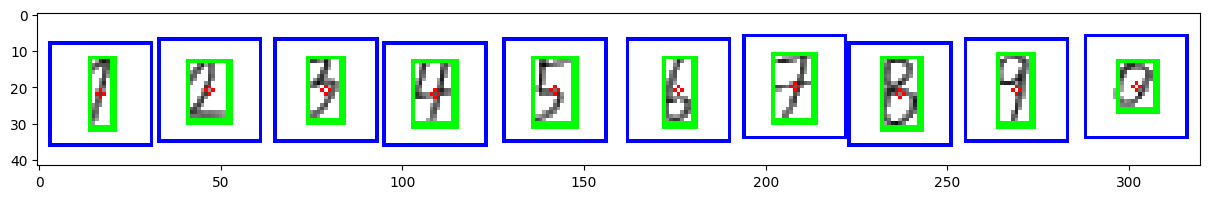

In [10]:
plt.figure(figsize=(15 ,12))
plt.imshow(no_data)

In [11]:
import cv2
import matplotlib.pyplot as plt

title1 = "No_data"
no_data = cv2.imread("images/Img_Num.jpg")
if (no_data is None):
    raise Exception("image load Err")
print(no_data.shape)
no_data[no_data >= 170] = 255

(42, 320, 3)


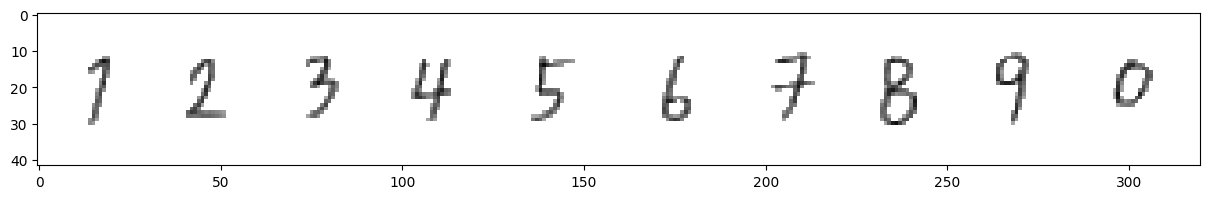

In [12]:
img_gray = cv2.cvtColor(no_data, cv2.COLOR_BGR2GRAY)
ret, img_th = cv2.threshold(img_gray, 150, 230, cv2. THRESH_BINARY_INV)
contours, hierachy= cv2.findContours(img_th.copy(),cv2.RETR_EXTERNAL, cv2. CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
plt.figure(figsize=(15,12))
plt.imshow(no_data)

In [13]:
centers = list()
for rect in rects:
    centers.append([rect[0] + (rect[2]/2), rect[1] + (rect[3]/2)])
print(centers)

[[302.0, 19.5], [108.5, 21.5], [46.5, 21.0], [237.0, 21.5], [176.0, 21.0], [141.5, 21.0], [78.5, 20.5], [17.0, 21.5], [268.5, 20.5], [207.5, 20.0]]


In [14]:
for center_data in centers:
    print(int(center_data[0]), int(center_data[1]))
    t_x = int(center_data[0])
    t_y = int(center_data[1])

302 19
108 21
46 21
237 21
176 21
141 21
78 20
17 21
268 20
207 20


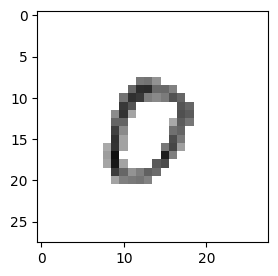

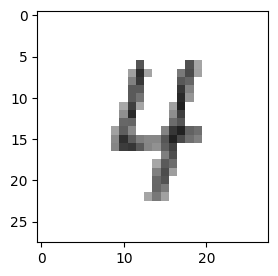

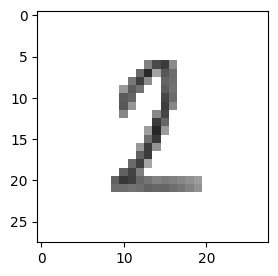

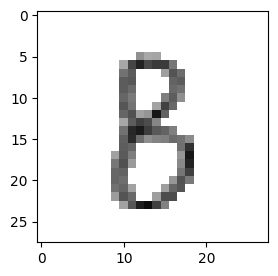

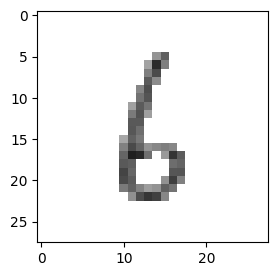

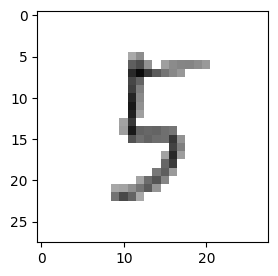

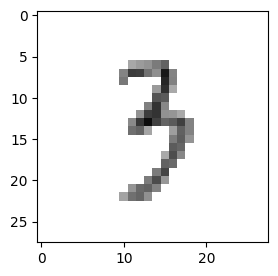

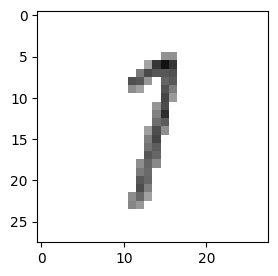

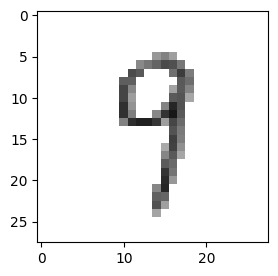

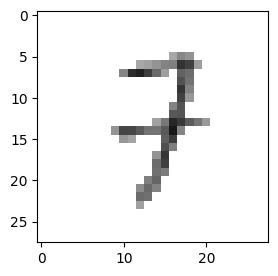

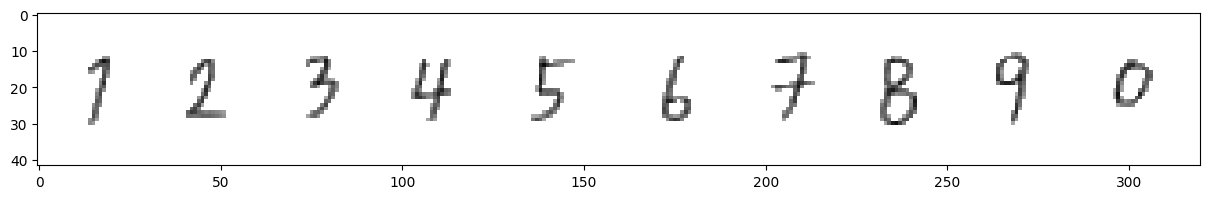

In [20]:
i_i = 0
for center_data in centers:
    t_x = int(center_data[0])
    t_y = int(center_data[1])
    rect_img = no_data[t_y-14:t_y+14, t_x-14:t_x+14]
    plt.figure(figsize=(3,3))
    plt.imshow(rect_img)
    i_i += 1
    cv2.imwrite("images/" + chr(i_i + 64) + ".jpg", rect_img)

plt.figure(figsize=(15,12))
plt.imshow(no_data)

예측

In [11]:
import tensorflow as tf
import sys 
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np
import cv2
model = load_model('model/14-0.0673.keras')
#model = load_model('/content/model_cnn/15-0.0595.hdf5')#colab₫ 79
model.summary


<bound method Model.summary of <Sequential name=sequential_17, built=True>>

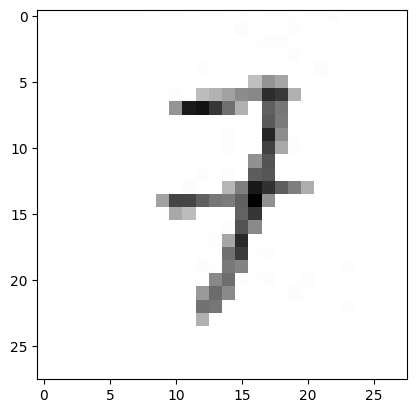

The Answer of J is 7


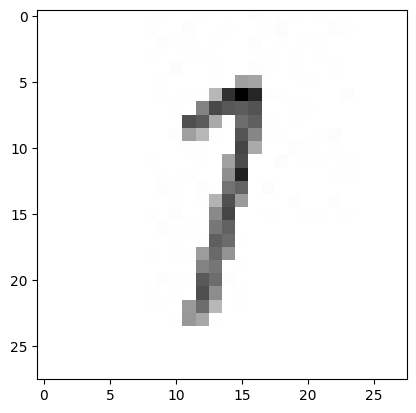

The Answer of H is 1


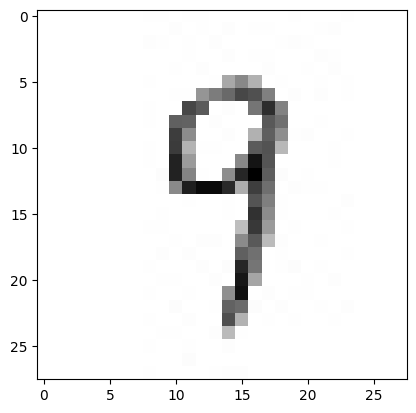

The Answer of I is 9


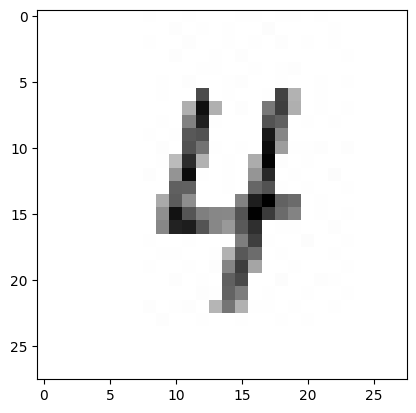

The Answer of B is 4


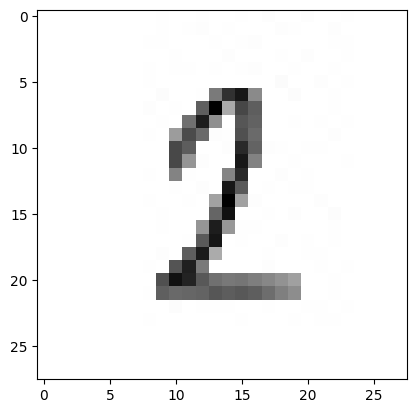

The Answer of C is 2


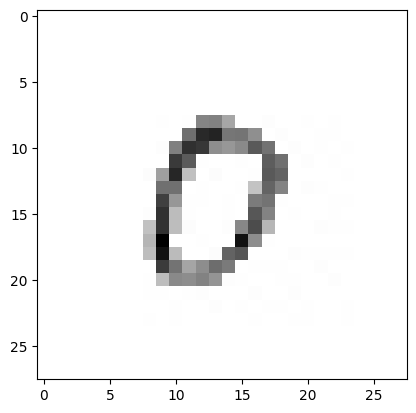

The Answer of A is 4


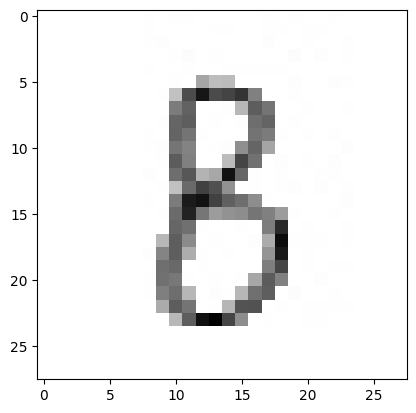

The Answer of D is 8


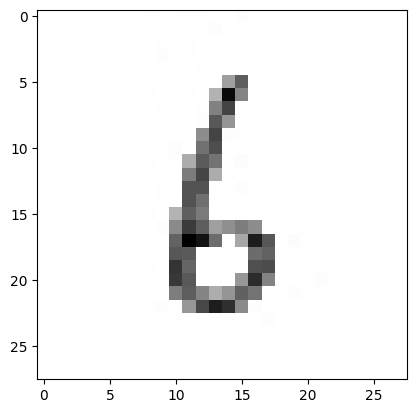

The Answer of E is 6


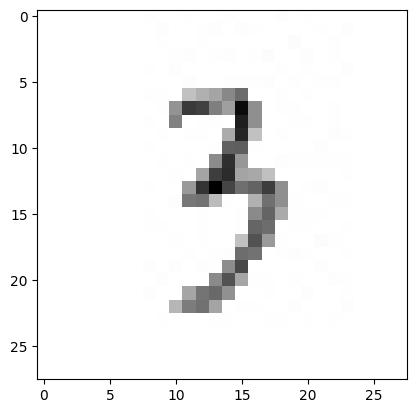

The Answer of G is 3


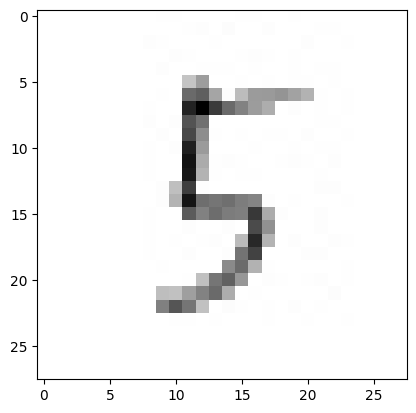

The Answer of F is 5


In [13]:
from glob import glob
import pathlib
img_path = 'images'
file_list = glob(img_path + "/*")

for pic in file_list:
    test_num = cv2.imread(pic)
    test_num = cv2.cvtColor(test_num, cv2.COLOR_BGR2GRAY)
    test_num = 255 - test_num
    plt. imshow(test_num, cmap='Greys');
    plt.show()

    test_num = test_num.reshape(1, 784).astype('float64') / 255
    test_predict = model.predict(test_num, verbose=0)
    name = pathlib.Path(pic).stem
    print( 'The Answer of', name ,'is', test_predict.argmax())
